# Import Moduals

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import NeuralNetwork

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.initializers import GlorotUniform
from keras.metrics import CategoricalAccuracy
from keras.losses import MeanSquaredError

from importlib import reload

metrics = CategoricalAccuracy()

# Preprocessing

In [3]:
# import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255
# network parameters
batch_size = 128
hidden_units = 128

# Keras' Model

In [76]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, use_bias=False))
#model.add(Dropout(0.45))
model.add(Dense(hidden_units, use_bias=False))
#model.add(Dropout(0.45))
model.add(Dense(num_labels, use_bias=False))
model.compile(loss=MeanSquaredError(), 
              optimizer=SGD(learning_rate=0.01),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1005 - accuracy: 0.5426
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.7344
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0560 - accuracy: 0.7764
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.7976
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.8082
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.8164
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.8219
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0470 - accuracy: 0.8262
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0464 - accuracy: 0.8293
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.8317

In [77]:
y_hat = model.predict(x_test)
metrics.update_state(y_test, y_hat)
metrics.result().numpy()

313/313 [==============================] - 0s 936us/step


0.84243333

# My Model

In [8]:
reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer, dropout

m = MyModel()
m.addLayer(MyLayer(input_size, hidden_units))
m.addLayer(dropout(0.5))
m.addLayer(MyLayer(hidden_units, num_labels))


m.fit(x_train, y_train, 0.01, epoches = 5, batch_size = batch_size)

Epoch  1: 469/469; Accuracy: 0.2673; Loss: 0.1906: 100%|
Epoch  2: 469/469; Accuracy: 0.4231; Loss: 0.1403: 100%|
Epoch  3: 469/469; Accuracy: 0.4980; Loss: 0.1114: 100%|
Epoch  4: 469/469; Accuracy: 0.5463; Loss: 0.1052: 100%|
Epoch  5: 469/469; Accuracy: 0.5865; Loss: 0.0993: 100%|


In [9]:
y_hat = m.predict(x_test)
metrics.reset_state()
metrics.update_state(y_test, y_hat)
metrics.result().numpy()

0.7993

In [10]:
reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer, dropoutLSH

m = MyModel()
m.addLayer(MyLayer(input_size, hidden_units))
m.addLayer(dropoutLSH(1))
m.addLayer(MyLayer(hidden_units, num_labels))


m.fit(x_train, y_train, 0.01, epoches = 5, batch_size = batch_size)

Epoch  1: 469/469; Accuracy: 0.2757; Loss: 0.2170: 100%|
Epoch  2: 469/469; Accuracy: 0.4228; Loss: 0.1584: 100%|
Epoch  3: 469/469; Accuracy: 0.4935; Loss: 0.1318: 100%|
Epoch  4: 469/469; Accuracy: 0.5404; Loss: 0.1042: 100%|
Epoch  5: 469/469; Accuracy: 0.5797; Loss: 0.1007: 100%|


In [12]:
y_hat = m.predict(x_test)
metrics.reset_state()
metrics.update_state(y_test, y_hat)
metrics.result().numpy()

0.8022

In [4]:
reload(NeuralNetwork)
from NeuralNetwork import MyModel, MyLayer

m = MyModel()
m.addLayer(MyLayer(input_size, hidden_units, dropout = True, dropout_probability = 0.5))
m.addLayer(MyLayer(hidden_units, num_labels))

lshm = MyModel()
lshm.addLayer(MyLayer(input_size, hidden_units, dropout_lsh = True, function_num=1))
lshm.addLayer(MyLayer(hidden_units, num_labels))


def f(x_train, y_train, x_test, y_test, model, batch_size, epoches, progress = True):
    metrics = CategoricalAccuracy()
    model.fit(x_train, y_train, 0.01, epoches = epoches, batch_size = batch_size, progress = progress)
    y_hat = model.predict(x_test)
    metrics.reset_state()
    metrics.update_state(y_test, y_hat)
    model.reset()
    return metrics.result().numpy()

# standard dropout
print("Standard dropout")
print("Accuracy: " + str(f(x_train, y_train, x_test, y_test, m, batch_size, epoches = 5, progress = True)))
# LSH dropout
print("\nLSH dropout")
print("Accuracy: " + str(f(x_train, y_train, x_test, y_test, lshm, batch_size, epoches = 5, progress = True)))

Standard dropout


Epoch  1: 100% |██████████| 469/469, Accuracy: 0.2669, Loss: 0.2295;
Epoch  2: 100% |██████████| 469/469, Accuracy: 0.4239, Loss: 0.1634;
Epoch  3: 100% |██████████| 469/469, Accuracy: 0.4974, Loss: 0.1221;
Epoch  4: 100% |██████████| 469/469, Accuracy: 0.5459, Loss: 0.1102;
Epoch  5: 100% |██████████| 469/469, Accuracy: 0.5871, Loss: 0.1059;


Accuracy: 0.8034

LSH dropout


Epoch  1: 100% |██████████| 469/469, Accuracy: 0.2762, Loss: 0.2225;
Epoch  2: 100% |██████████| 469/469, Accuracy: 0.4213, Loss: 0.1569;
Epoch  3: 100% |██████████| 469/469, Accuracy: 0.4899, Loss: 0.1262;
Epoch  4: 100% |██████████| 469/469, Accuracy: 0.5425, Loss: 0.1186;
Epoch  5: 100% |██████████| 469/469, Accuracy: 0.5812, Loss: 0.0964;


Accuracy: 0.8006


In [13]:
accuracy = [f(x_train, y_train, x_test, y_test, m, batch_size, epoches = 5, progress = False) for i in range(100)]
accuracy_lsh = [f(x_train, y_train, x_test, y_test, lshm, batch_size, epoches = 5, progress = False) for i in range(100)]

In [ ]:
print(np.mean(accuracy))
print(np.mean(accuracy_lsh))

0.79962003
0.801205


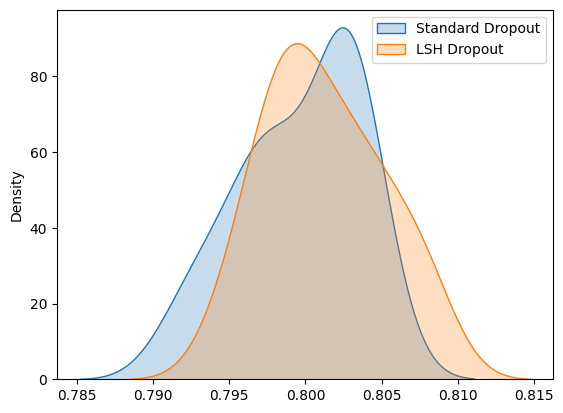

In [ ]:
sns.kdeplot(accuracy, fill=True, label="Standard Dropout")
sns.kdeplot(accuracy_lsh, fill=True, label="LSH Dropout")
plt.legend()
plt.show()